# Modulation transfer function (MTF)

In [56]:
from diffractio import np, plt
from diffractio import mm, um, degrees
from diffractio.diffractio import Diffractio

from diffractio.utils_optics import MTF_ideal, get_MTF_frequency

from typing import Tuple


## MTF for 1D scalar fields

**Intensity distribution at focus**

In [57]:
wavelength=0.6328*um
num_data = 1024*32 

size = .25*mm
x0=np.linspace(-size/2, size/2, num_data)


In [58]:
u0 = Diffractio('scalar', 'source', x=x0,  wavelength=wavelength)
u0.plane_wave()

In [59]:
radius_lens = size/2
focal = 1 * mm
d_focal = 0 *mm
distance = focal + d_focal


In [60]:
t_lens = Diffractio('scalar', 'mask', x=x0, wavelength= wavelength)
t_lens.lens(x0=0, radius=radius_lens, focal=focal)

Good result: factor 327.88


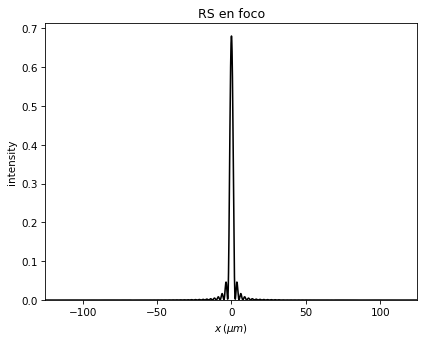

In [61]:
# focused light beam 
u1 = u0 * t_lens

u2_x = u1.RS(z=distance)
u2_x.draw(logarithm=1e-2)

plt.title("RS en foco")

frequency cut = 395.07 lines/mm


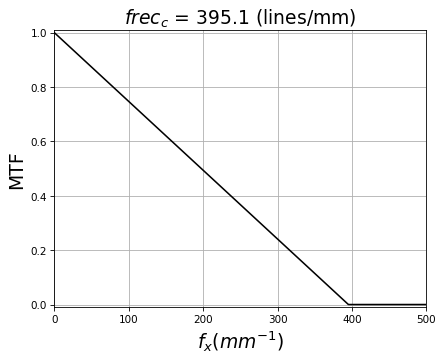

In [62]:
# Ideal MTF
freqs = np.linspace(0, 500, 600)  # in cycles/mm

mtf_ideal, freq_corte = MTF_ideal(frequencies = freqs, wavelength=wavelength, diameter=2*radius_lens,
                                    focal=focal, kind="1D", has_draw=True, verbose=True)

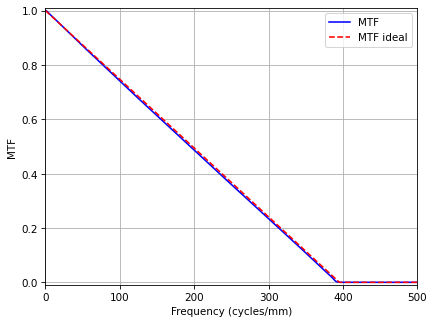

In [63]:
mtf = u2_x.MTF(freqs, incoherent=True, has_draw=True)
plt.plot(freqs, mtf_ideal, 'r--', label='MTF ideal');
plt.legend()

**Intensity distribution out-of-focus**

Good result: factor 334.21


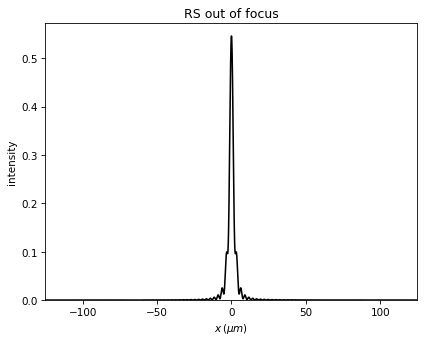

In [64]:
u1 = u0 * t_lens

u3_x = u1.RS(z=distance+20*um)
u3_x.draw(logarithm=1e-2)

plt.title("RS out of focus")

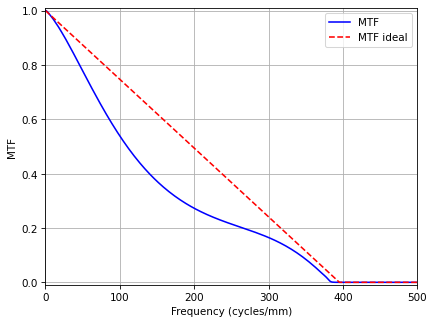

In [65]:
mtf_czt_1d = u3_x.MTF(freqs, incoherent=True, has_draw=True)
plt.plot(freqs, mtf_ideal, 'r--', label='MTF ideal'); plt.legend()

## MTF for 2D scalar fields

**Intensity distribution at focus**

In [66]:
wavelength=0.6328*um
num_data = 2048 

size = 4*mm
x0=np.linspace(-size/2, size/2, num_data)
y0=np.linspace(-size/2, size/2, num_data)

In [67]:
u0 = Diffractio('scalar', 'source', x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

In [68]:
radius_lens = size/2
focal = 25 * mm

freq_max = 250  # in cycles/mm

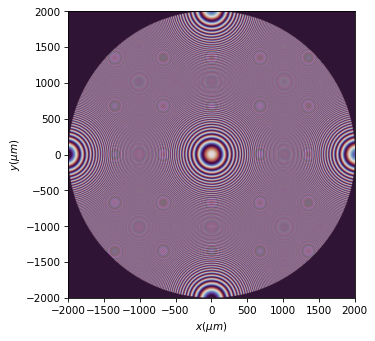

In [69]:
t_lens = Diffractio('scalar', 'mask', x=u0.x, y=u0.y, wavelength=u0.wavelength)
t_lens.lens(r0=(0, 0), radius=radius_lens, focal=(focal, focal))
t_lens.pupil()
t_lens.draw(kind='phase', percentage_intensity=1e-6)

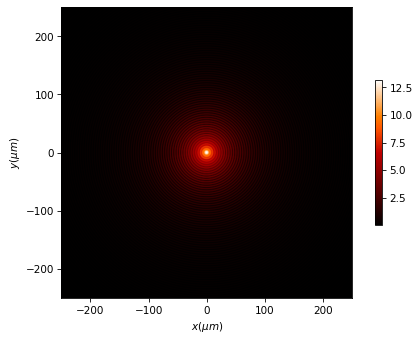

In [70]:
u1_xy = u0 * t_lens

xout = np.linspace(-size/16, size/16, num_data)
yout = np.linspace(-size/16, size/16, num_data)

u2_xy = u1_xy.CZT(z=focal, xout=xout, yout=yout)
u2_xy.draw(logarithm=1e0, has_colorbar='vertical')

**Ideal MTF (profile)**

frequency cut = 252.84 lines/mm


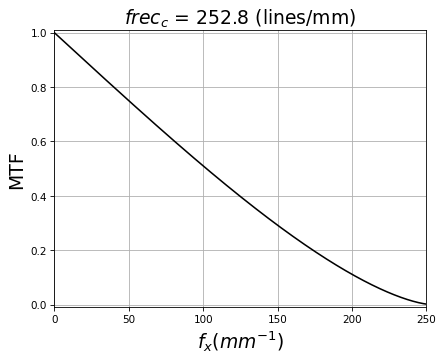

In [71]:

freqs_2d = np.linspace(0, freq_max, 600)  # in cycles/mm

mtf_ideal_2d, freq_corte_2d = MTF_ideal( frequencies= freqs_2d,  wavelength=wavelength, diameter=2*radius_lens, 
                                  focal=focal, kind="2D", has_draw=True, verbose=True)


**MTF profiles for plane wavefront**

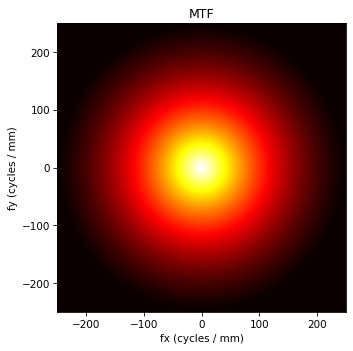

In [72]:
# Example 

fx = np.linspace(-freq_max, freq_max, 200)
fy = np.linspace(-freq_max, freq_max, 200)

mtf2d = u2_xy.MTF(fx, fy, incoherent=True, has_draw=True)


**Radial profile**

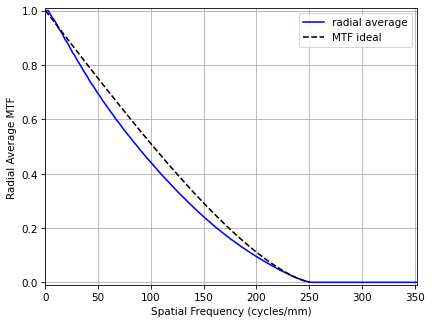

In [73]:
(fr,mtf_rad) = u2_xy.MTF_radial(fx,fy,incoherent=True,
                        has_draw = True, mtf_ideal = (freqs_2d, mtf_ideal_2d))



frequency at MTF = 0.5: 87.5045 cycles/mm


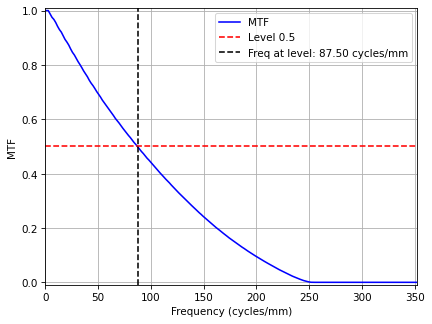

In [74]:
level = 0.5
MTF_frec = get_MTF_frequency(fr, mtf_rad, level= level, has_draw=True, verbose=True)


**Profile at an angle**

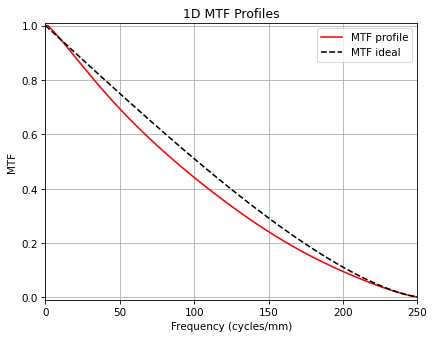

In [75]:
freqs_profile, mtf_profile = u2_xy.MTF_profile(fx,fy, angle=45*degrees, incoherent=True,
                length=freq_max, npixels=1024, has_draw = True, mtf_ideal = (freqs_2d, mtf_ideal_2d))

**MTF profiles**

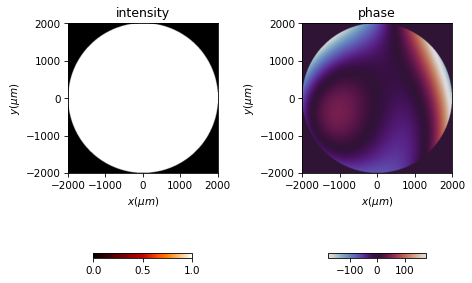

In [88]:
u0 = Diffractio('scalar', 'source', x=x0, y=y0, wavelength=wavelength)
u0.zernike_beam(A= 1, r0=(0*um, 0*um), radius=size/2, n=[1, 2, 3], m=[1, 2, 3,], c_nm=[1,1,1])
u0.zernike_beam(A= 1, r0=(0*um, 0*um), radius=size/2, n=[1, 2, 2, 3], m=[1, 2, -2, 1], c_nm=[.5, .5, .5, .5])

u0.pupil()
u0.draw('field')
plt.tight_layout()


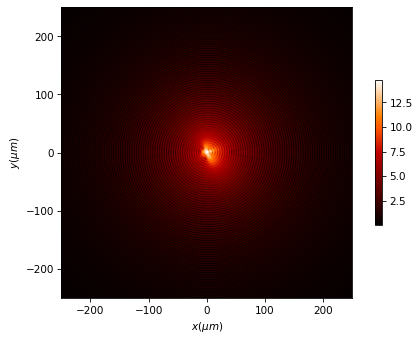

In [89]:
u1_xy = u0 * t_lens
xout = np.linspace(-size/16, size/16, num_data)
yout = np.linspace(-size/16, size/16, num_data)
u2_xy = u1_xy.CZT(z=focal, xout=xout, yout=yout)
u2_xy.draw(logarithm=1e1, has_colorbar='vertical')

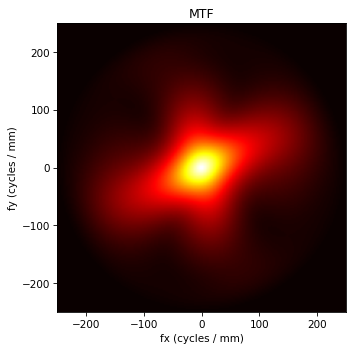

In [90]:
# Example 

fx = np.linspace(-freq_max, freq_max, 200)
fy = np.linspace(-freq_max, freq_max, 200)

mtf2d = u2_xy.MTF(fx, fy, incoherent=True, has_draw=True)


**Profile at an angle**

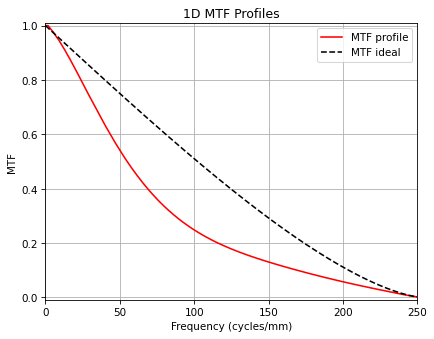

In [91]:
freqs_profile, mtf_profile = u2_xy.MTF_profile(fx,fy, angle=45*degrees, incoherent=True,
                                         length=freq_max, npixels=1024, has_draw = True, mtf_ideal = (freqs_2d, mtf_ideal_2d))



**Radial profile**

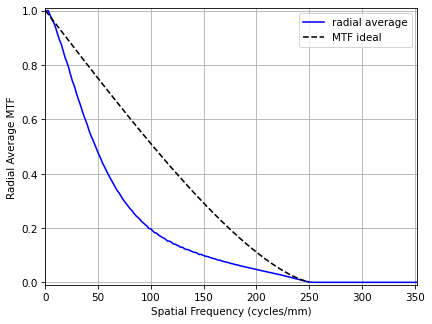

In [92]:
(fr,mtf_rad) = u2_xy.MTF_radial(fx,fy,incoherent=True,
                        has_draw = True, mtf_ideal = (freqs_2d, mtf_ideal_2d))



**Profile at several angles**

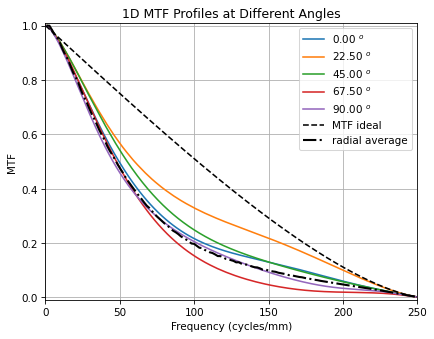

In [96]:
all_freqs, all_mtf_profiles = u2_xy.MTF_profiles(fx,fy, angles=np.linspace(0, 90, 5)*degrees, incoherent=True,
                                         length=freq_max, npixels=1024, has_draw = True, mtf_ideal = (freqs_2d, mtf_ideal_2d))

plt.plot(fr, mtf_rad, 'k-.',lw=2, label='radial average')
plt.legend()

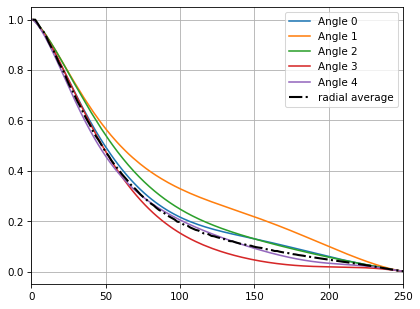

In [97]:
for i, freqs, mtf_profile in zip(range(all_mtf_profiles.shape[0]), all_freqs, all_mtf_profiles):
    plt.plot(freqs, mtf_profile, label=f'Angle {i}')
plt.plot(fr, mtf_rad, 'k-.',lw=2, label='radial average')
plt.legend()
plt.xlim(0,freq_max)
plt.grid()

## Get frequency at which MTF drops to a given value

frequency at MTF = 0.5: 46.8458 cycles/mm


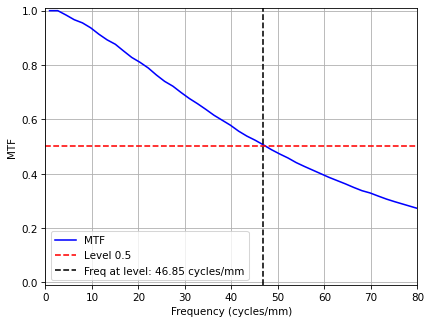

In [98]:
level = 0.5
MTF_frec = get_MTF_frequency(fr, mtf_rad, level= level, has_draw=True, verbose=True)
plt.xlim(0,80)
